In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use('default')
churn_data=pd.read_csv('data/churn.csv')
churn_data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Номер 1

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

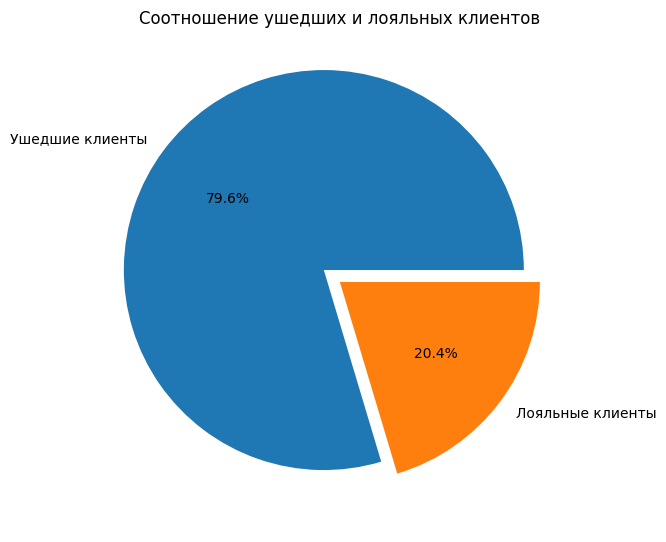

In [14]:
vaccine_combinations = churn_data['Exited'].value_counts()
vaccine_combinations.index=['Ушедшие клиенты','Лояльные клиенты']
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0]
)
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=12)


Ответ: Число ушедщих клиентов в 4 раза больше лояльных.

Номер 2

Text(0, 0.5, 'Число наблюдений')

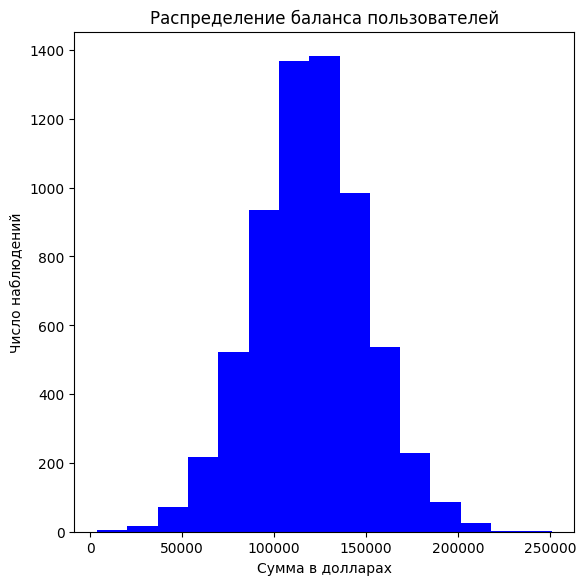

In [15]:
balance = churn_data[churn_data['Balance']>2500]['Balance']
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(x=balance, color='blue', bins = 15)
axes.set_title('Распределение баланса пользователей')
axes.set_xlabel('Сумма в долларах') 
axes.set_ylabel('Число наблюдений')

1) По гистограмме можно судить о частоте попадания балнса пользователя в определённый интервал.На оси абсцисс отложен диапазон баланса пользователя (в долларах), разбитый на петнадцать равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.
2) Большая часть наблюдений баланса пользователя находится в интервале от 100000 до 150000 (долларов).

Вывод:
У большинства пользователей баланс счёта находиться в интервале от 100000 до 150000 (долларов).

Номер 3

Text(0.5, 0, 'Сумма в долларах')

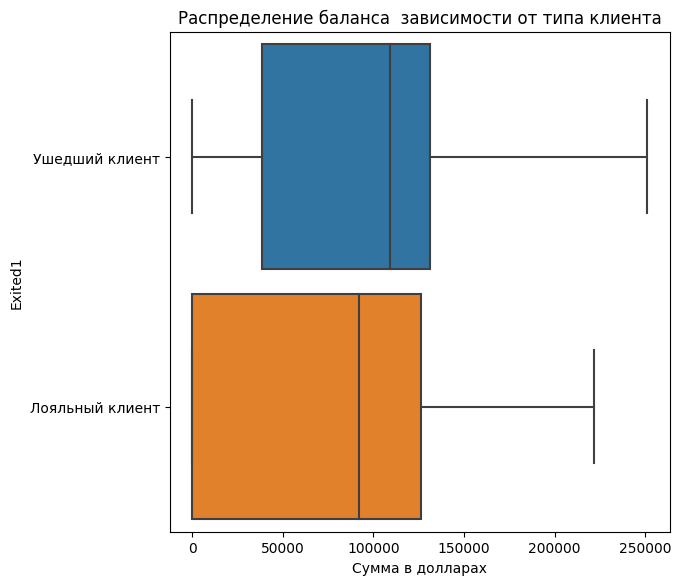

In [61]:
churn_df=churn_data.copy()
churn_df['Exited1']=churn_df['Exited'].apply(lambda x: 'Ушедший клиент' if x==1 else 'Лояльный клиент')
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited1',
    x='Balance',
    orient='h',
    width=0.9
)
axes.set_title('Распределение баланса  зависимости от типа клиента')
axes.set_xlabel('Сумма в долларах') 


1) У ушедших клиентов разброс суммы на счетах меньше, чем у лояльных. (ширина ящика наименьшая)
Это, скорее всего, свзяно с приходом новых клиентов, которые еще не пополняли свои счета.
2) Медиана у ушедших больше, чем у лояльных. 
Я считаю, что для считов, где сумма баланса выше 100000 (долларов), появляются новые условия(например: процентая ставка на накопительный счете понижается вместо 3%, становиться 1%) и они являются невыгодными, и поэтому клиенты уходят.

Номер 4

Text(0.5, 1.0, 'Распределение возраста в зависимости от типа клиента')

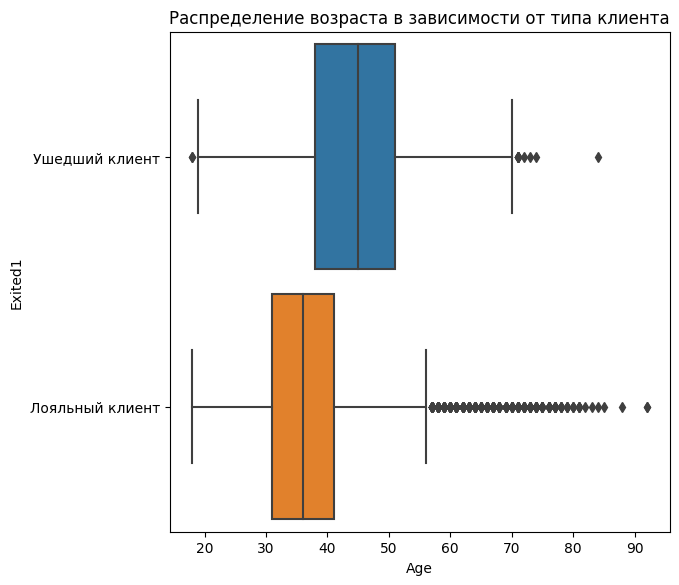

In [64]:

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited1',
    x='Age',
    orient='h',
    width=0.9
)
axes.set_title('Распределение возраста в зависимости от типа клиента')


1) У лояльных клиентов мидиана приблизительно равна 37, а ушедших 45. Можно сделать вывод, что возраст ушедших клиентов старше.
2) В руппе лояльных клиентов в разы больше потенциальных выбросов.
3) Банку следует обратить свое внимание на возрастную группу 40-55 (люди допенсионого возраста) , там происходит гланый отток клиентов.

Номер 5

Text(0, 0.5, 'Кредитный рейтинг')

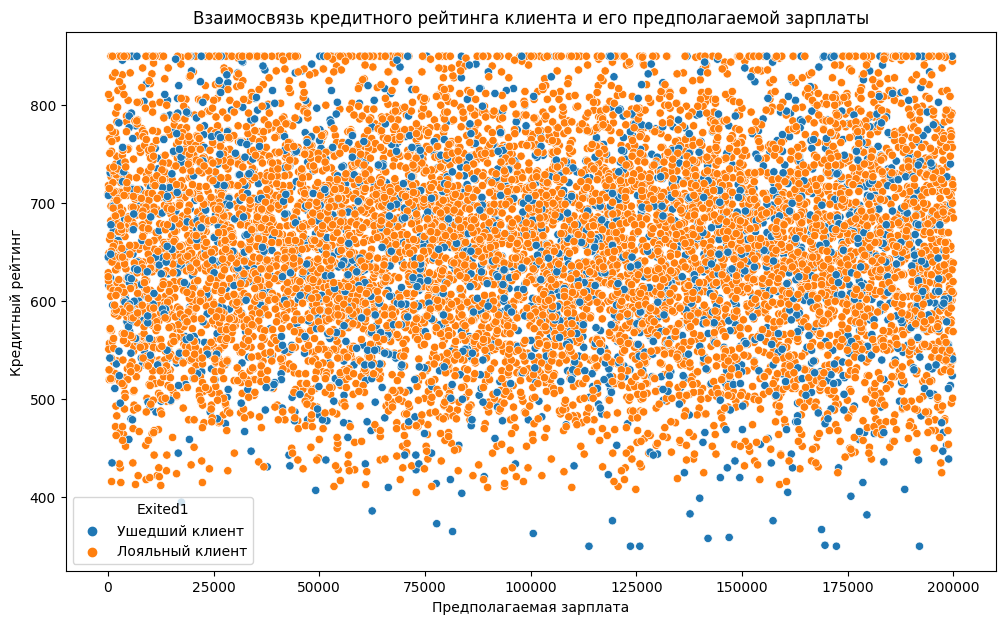

In [65]:


fig = plt.figure(figsize=(12, 7))

scatterplot = sns.scatterplot(
    data=churn_df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited1'
    
    

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=12)
scatterplot.set_xlabel('Предполагаемая зарплата')
scatterplot.set_ylabel('Кредитный рейтинг')

1) Я не вижу явной взаимосвязи.

Номер 6

Text(0.5, 1.0, 'График ухода взависимости от пола')

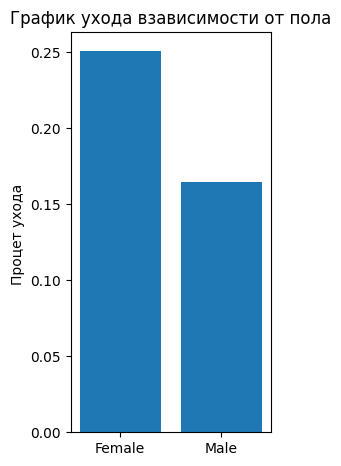

In [43]:
mn=churn_data.groupby('Gender')['Exited'].mean()
fig = plt.figure(figsize=(2, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = mn.index,
    height = mn,
    )
main_axes.set_ylabel('Процет ухода ')
main_axes.set_title('График ухода взависимости от пола')

1) Женщин чаще мужчин уходят из банка.

Номер 7 

Text(0.5, 1.0, 'Средний процент приобретенных услуг')

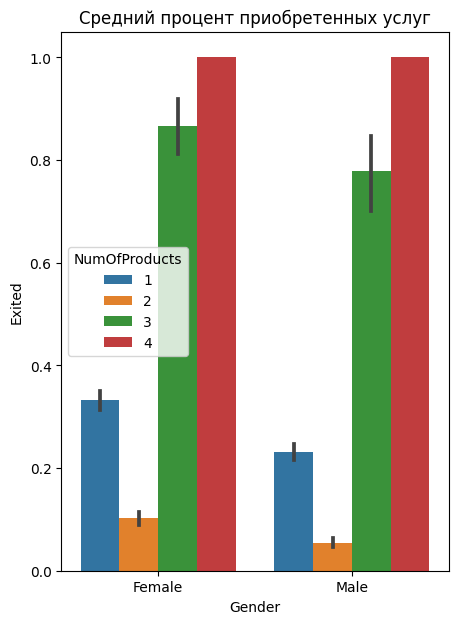

In [100]:
fig = plt.figure(figsize=(5, 7))

barplot = sns.barplot(
    data=churn_df,
    x='Gender',
    y='Exited',
    hue='NumOfProducts'
)
barplot.set_title('Средний процент ухода клиентов по кол-ву приобретенных услуг')

1) Люди у кого 3 или более услуг в банке, с большей вероятностью уходят из банка.
2) У кого 4 услуги со 100% меняют банк, это скорее все связано с дополнительной комиссией.

Номер 8

Text(0.5, 1.0, 'Наличие статуса активного клиента на отток клиентов')

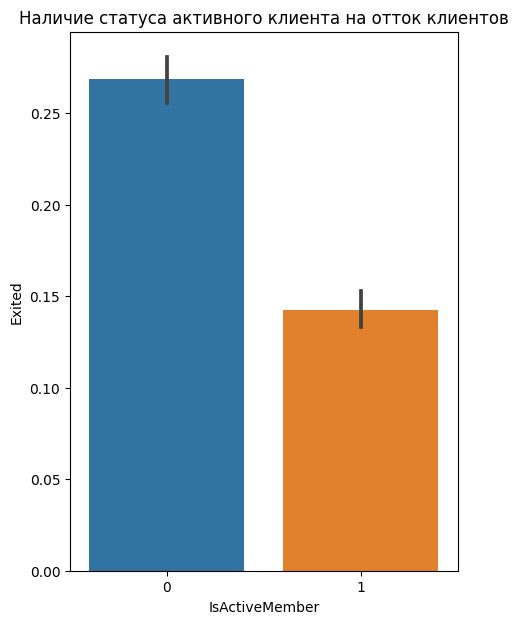

In [93]:
fig = plt.figure(figsize=(5, 7))

barplot = sns.barplot(
    data=churn_df,
    x='IsActiveMember',
    y='Exited'
    
)
barplot.set_title('Наличие статуса активного клиента на отток клиентов')

1) Отток клиентов среди неактивных выше.
2) Делать их более активными, например, создавать кикие-либо игры или викторины, за которые можно получать бонусы и подарки.

Номер 9

In [78]:
strana = churn_data.groupby(['Geography'], as_index=False).mean()

fig = px.choropleth(
    data_frame=strana, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.4], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale=px.colors.sequential.Plasma #палитра цветов
)

#отображаем график
fig.show()

1) Доля ущедших клиентов в Германии больше всего. Это может быть связано с открыем нового банка в Германии, в котором процентная ставка на остаток по счету выше.

Номер 10

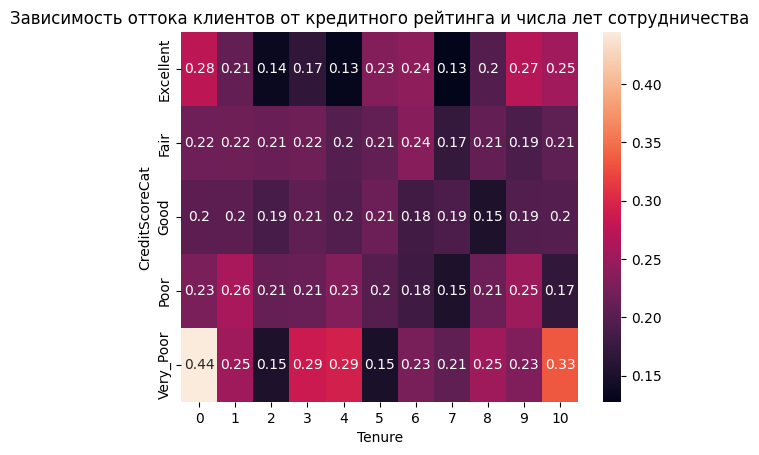

In [80]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_df['CreditScoreCat']=churn_df['CreditScore'].apply(get_credit_score_cat)
pivot = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True)
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества')

1) Чаще всего уходят люди, чей ретинг за 10 лет сотрудничества банка не вырос или новые клиенты чей рейтинг 'Very_Poor' .